In [10]:
""" 
04 MARCH 2024 
Theo Gauvrit
Testing the higher baseline hypothesis to explain the no detection of tactile stimulus on KO mice.
"""

import numpy as np
import pandas as pd
import percephone.core.recording as pc
import os
import percephone.plts.behavior as pbh
import matplotlib
import percephone.plts.stats as ppt
import matplotlib.pyplot as plt
import percephone.analysis.mlr_models as mlr_m
from multiprocessing import Pool, cpu_count
from scipy.cluster.hierarchy import dendrogram, linkage

plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 2
plt.switch_backend("Qt5Agg")
matplotlib.use("Qt5Agg")
%matplotlib inline

directory = "/datas/Théo/Projects/Percephone/data/Amplitude_Detection/loop_format_tau_02/"
roi_info = pd.read_excel(directory + "/FmKO_ROIs&inhibitory.xlsx")
files = os.listdir(directory)
files_ = [file for file in files if file.endswith("synchro")]
font_s = 30

def opening_rec(fil,i):
    rec = pc.RecordingAmplDet(directory + fil + "/", 0, fil, roi_info)
    return rec

workers = cpu_count()
pool = Pool(processes=workers)
async_results = [pool.apply_async(opening_rec, args=(file,i)) for i,file in enumerate(files_)]
recs = [ar.get() for ar in async_results]

Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.


In [11]:

def cross_cor_prestim(rec, ax, title):

    exc = rec.zscore_exc[:, np.linspace(rec.stim_time[~rec.detected_stim] - int(1 * rec.sf), rec.stim_time[~rec.detected_stim], int(1 * rec.sf), dtype=int)]
    exc_ = exc.reshape(len(rec.df_f_exc), len(rec.stim_time[~rec.detected_stim]) * int(1 * rec.sf))
    corr = np.corrcoef(exc_)
    corr[corr==np.NAN]=0
    Z = linkage(corr, 'ward', optimal_ordering=True)
    dn_exc = dendrogram(Z, no_plot=True, count_sort="ascending")
    order_s =  dn_exc["leaves"]
    h = ax.imshow(corr[order_s][:, order_s], cmap="seismic", vmin=-1, vmax=+1, interpolation="none")
    ax.set_xlabel("Neuron i")
    ax.set_ylabel("Neuron j")
    ax.set_title(title)


Text(0.5, 0.98, 'Cross correlation of prestimlus activity for UNDETECTED trials')

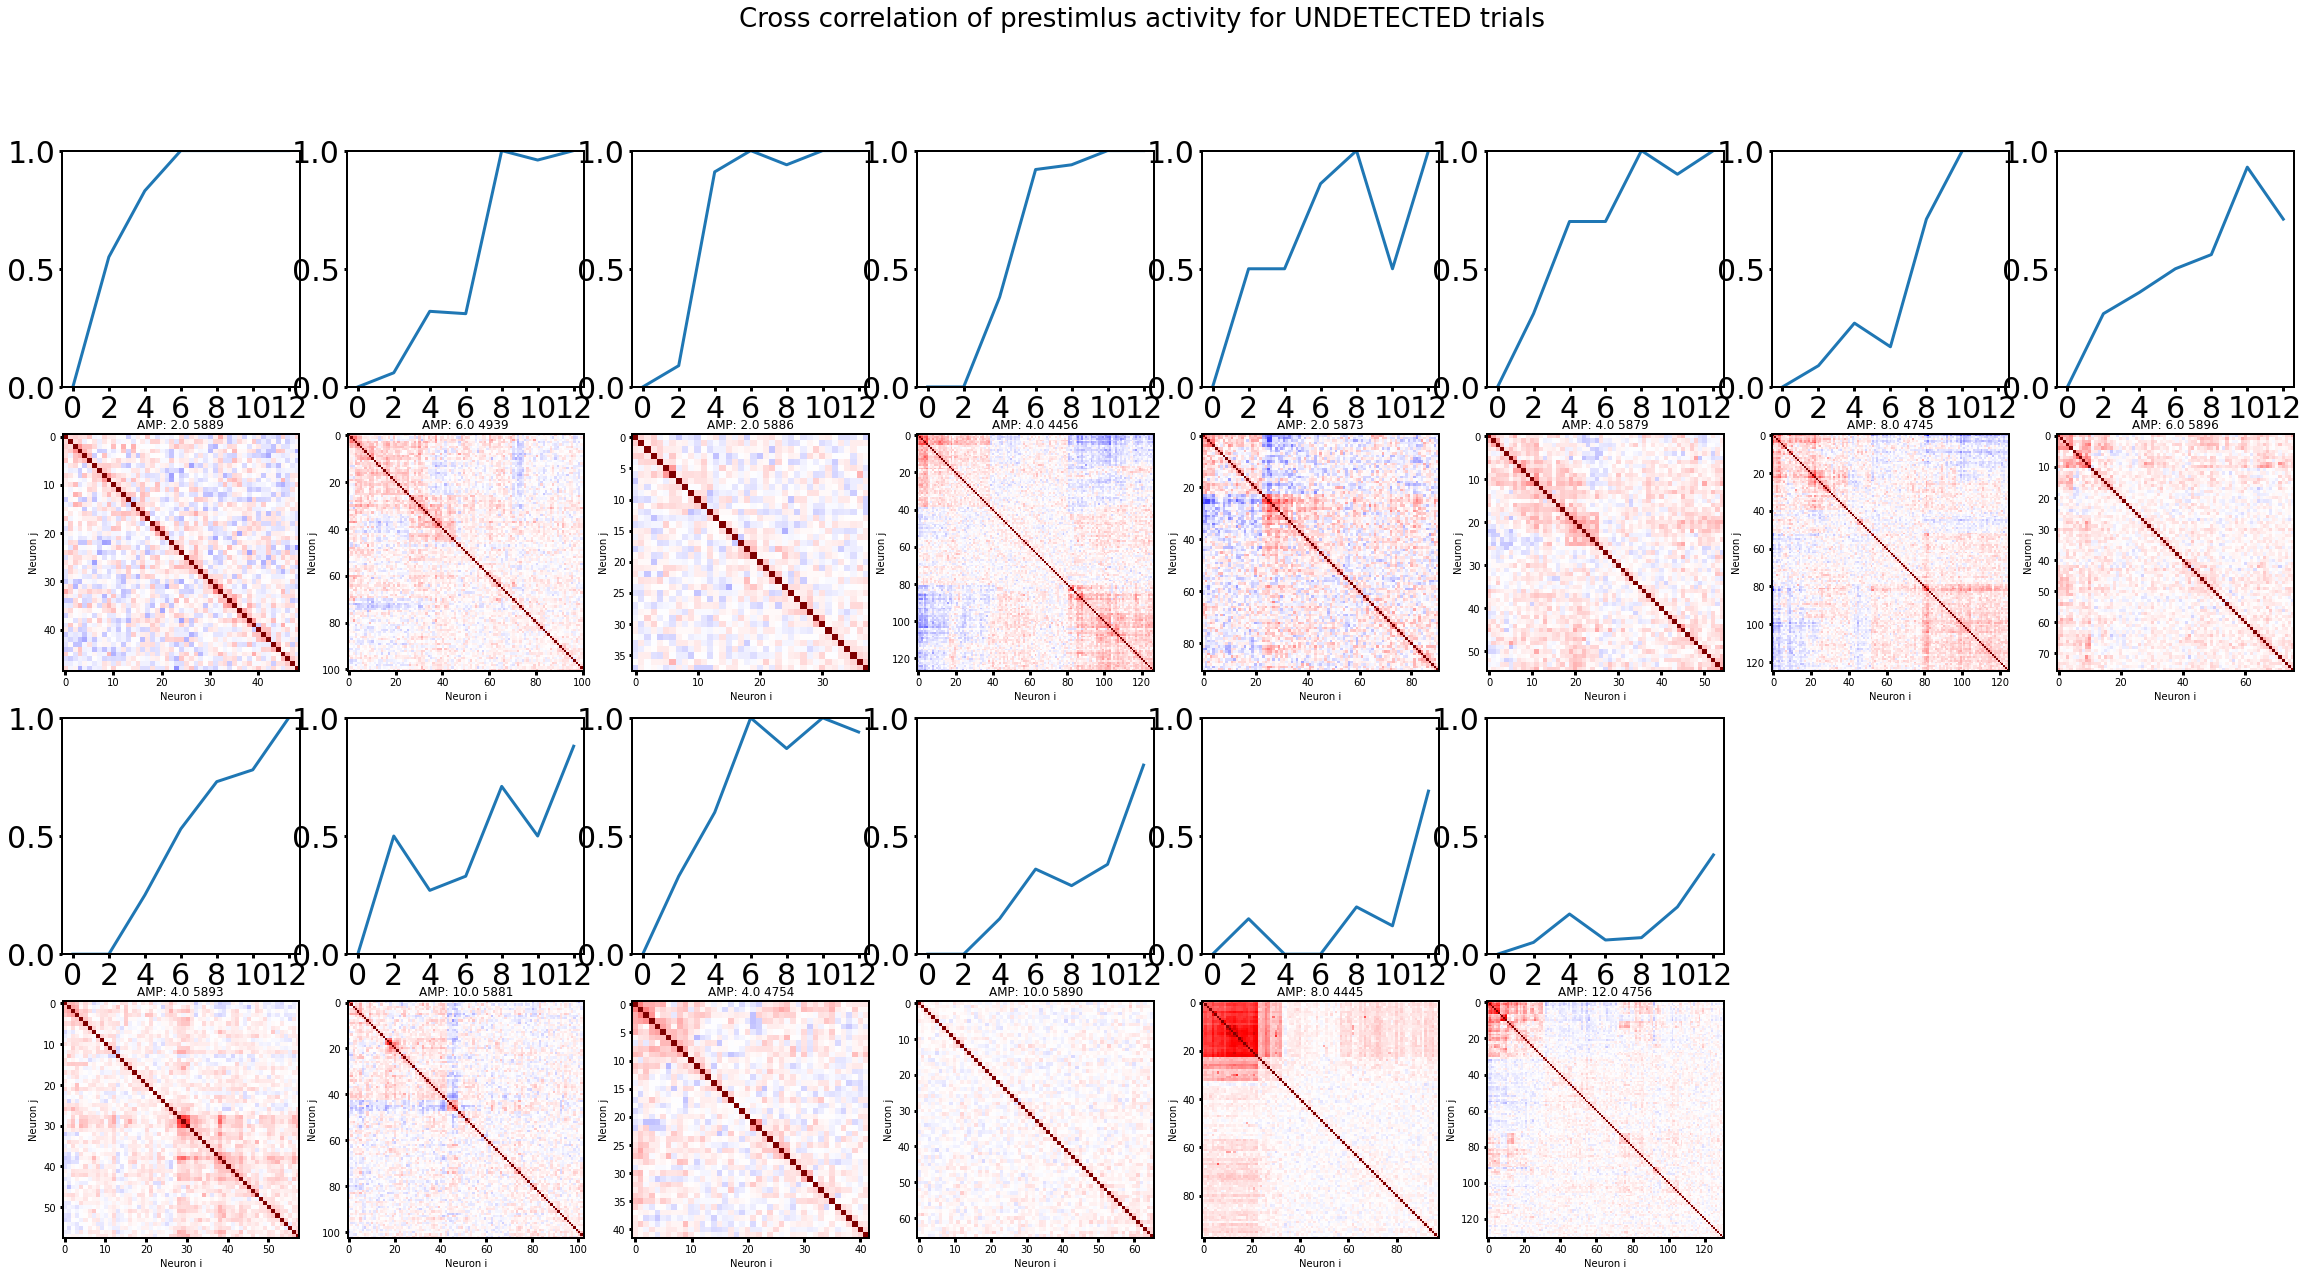

In [13]:

y, i = 0, 0
fig, ax = plt.subplots(4, 8, figsize=(40, 20))

for rec in recs:
        if rec.genotype == "WT":
            pbh.psycho_like_plot(rec, roi_info, ax[0, i])
            cross_cor_prestim(rec,ax[1, i], "AMP: " + str(rec.threshold) + " " + str(rec.filename))
            i = i + 1
        else:
            pbh.psycho_like_plot(rec, roi_info, ax[2, y])
            cross_cor_prestim(rec,ax[3, y], "AMP: " + str(rec.threshold) + " " + str(rec.filename))
            y = y + 1
            
ax[2, 6].set_axis_off()
ax[2, 7].set_axis_off()
ax[3, 6].set_axis_off()
ax[3, 7].set_axis_off()
fig.suptitle('Cross correlation of prestimlus activity for UNDETECTED trials', fontsize=26)